In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
from scipy import stats 
import numpy as np

In [2]:
df=pd.read_csv("healthcare_dataset.csv")

In [3]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [4]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2022-04-27,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [5]:
import pandas as pd

# Load your file
df=pd.read_csv("healthcare_dataset.csv")


# Group by Doctor and sum billing
result = (
    df.groupby("Doctor")["Billing Amount"]
      .sum()
      .reset_index()
      .sort_values(by="Billing Amount", ascending=False)   # ⬅️ ascending order
)

print(result)


                   Doctor  Billing Amount
6460      Michael Johnson   181576.474893
1753    Christopher Davis   159763.924755
4087       Jennifer Smith   149972.685230
7593         Robert Brown   147747.938399
570          Angela Jones   141867.200639
...                   ...             ...
5212        Kevin Higgins     1032.263087
468        Andrea Cordova     1020.337790
1787  Christopher Jenkins     1009.417327
1826     Christopher Ruiz     1004.416897
7939        Samuel Taylor     1000.180837

[9416 rows x 2 columns]


In [6]:
import pandas as pd

# Display table properly
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load your file
df=pd.read_csv("healthcare_dataset.csv")

# Convert date columns
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

# Create Days Stayed
df["Days Stayed"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# Show table clearly
print(df)


                      Name  Age  Gender Blood Type Medical Condition  \
0          Tiffany Ramirez   81  Female         O-          Diabetes   
1              Ruben Burns   35    Male         O+            Asthma   
2                Chad Byrd   61    Male         B-           Obesity   
3        Antonio Frederick   49    Male         B-            Asthma   
4      Mrs. Brandy Flowers   51    Male         O-         Arthritis   
...                    ...  ...     ...        ...               ...   
9995            James Hood   83    Male         A+           Obesity   
9996       Stephanie Evans   47  Female        AB+         Arthritis   
9997  Christopher Martinez   54    Male         B-         Arthritis   
9998           Amanda Duke   84    Male         A+         Arthritis   
9999             Eric King   20    Male         B-         Arthritis   

     Date of Admission             Doctor                   Hospital  \
0           2022-11-17     Patrick Parker           Wallace-Ham

In [7]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days Stayed
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal,4
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal,23
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal,14
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal,20


In [8]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df=pd.read_csv("healthcare_dataset.csv")

# Convert dates
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

# Create new column
df["Days Stayed"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

# Sort by days stayed (descending)
df = df.sort_values(by="Days Stayed", ascending=False)

print(df)


                Name  Age  Gender Blood Type Medical Condition  \
2073  Brenda Stewart   42    Male         A+            Asthma   
2054    Nancy Campos   79    Male         O-         Arthritis   
2002      Todd Henry   21  Female         O+      Hypertension   
2118   Jack Campbell   31  Female         B+            Asthma   
2116   Timothy Lucas   35    Male         O-          Diabetes   
...              ...  ...     ...        ...               ...   
731     Jeremy Jones   61  Female         B-            Asthma   
6351   Antonio Evans   52  Female        AB-            Cancer   
5132   Brian Watkins   49    Male         O-            Asthma   
9904  Anthony Warner   57  Female         B-         Arthritis   
4189   Haley Andrade   69  Female         A+            Asthma   

     Date of Admission            Doctor                    Hospital  \
2073        2021-03-06    Daniel Winters             Daniels-Alvarez   
2054        2021-10-16     Shannon Moore     Moore, Parker and 

In [9]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days Stayed
2073,Brenda Stewart,42,Male,A+,Asthma,2021-03-06,Daniel Winters,Daniels-Alvarez,Aetna,16893.294568,248,Emergency,2021-04-05,Penicillin,Abnormal,30
2054,Nancy Campos,79,Male,O-,Arthritis,2021-10-16,Shannon Moore,"Moore, Parker and Wells",Medicare,48541.850206,371,Elective,2021-11-15,Penicillin,Normal,30
2002,Todd Henry,21,Female,O+,Hypertension,2020-02-27,Albert Curtis,Klein-Kelly,UnitedHealthcare,7505.183787,351,Urgent,2020-03-28,Lipitor,Normal,30
2118,Jack Campbell,31,Female,B+,Asthma,2022-07-20,Bryan Martin,Young LLC,Cigna,49041.837125,110,Emergency,2022-08-19,Penicillin,Abnormal,30
2116,Timothy Lucas,35,Male,O-,Diabetes,2021-03-17,William Parks,Vasquez-Crawford,UnitedHealthcare,14480.208002,108,Elective,2021-04-16,Ibuprofen,Normal,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Jeremy Jones,61,Female,B-,Asthma,2023-05-18,Linda Tran,Sanders and Sons,UnitedHealthcare,5936.854428,248,Emergency,2023-05-19,Ibuprofen,Inconclusive,1
6351,Antonio Evans,52,Female,AB-,Cancer,2022-06-08,Tracy Young,"Sharp, Giles and Pollard",Aetna,26968.694505,362,Elective,2022-06-09,Ibuprofen,Abnormal,1
5132,Brian Watkins,49,Male,O-,Asthma,2023-08-23,Carrie Anderson,Cunningham-Gomez,Cigna,49757.189858,223,Urgent,2023-08-24,Aspirin,Normal,1
9904,Anthony Warner,57,Female,B-,Arthritis,2022-09-14,Tammy Washington,"Cabrera, Chavez and Juarez",Aetna,29362.847315,448,Elective,2022-09-15,Lipitor,Abnormal,1


In [10]:
import pandas as pd

# Load your file
df=pd.read_csv("healthcare_dataset.csv")   # change to your file name


# Count number of patients per doctor
patients_per_doctor = (
    df.groupby("Doctor")
      .size()
      .reset_index(name="Number of Patients")
      .sort_values("Number of Patients", ascending=False)   # ⬅️ DESCENDING
)

print(patients_per_doctor)



                  Doctor  Number of Patients
6460     Michael Johnson                   7
3724         James Perez                   5
4087      Jennifer Smith                   5
6522       Michael Smith                   5
6216       Matthew Smith                   5
...                  ...                 ...
9395   Zachary Gutierrez                   1
9396  Zachary Horton DDS                   1
9397        Zachary King                   1
9398         Zachary Lee                   1
1          Aaron Barrera                   1

[9416 rows x 2 columns]


In [11]:
import pandas as pd

# Load your file
df=pd.read_csv("healthcare_dataset.csv")   # change name if needed

# Filter to only Michael Johnson's patients
mj_patients = df[df["Doctor"] == "Michael Johnson"]

print(mj_patients)


                 Name  Age  Gender Blood Type Medical Condition  \
1862  Sherri Mckinney   67    Male         O+            Asthma   
5908  Brittany Glover   57    Male         A+            Asthma   
6397     Maria Carter   59  Female        AB-          Diabetes   
6411    Joshua Bailey   78  Female         A+           Obesity   
6875     Rebecca King   45  Female         O+            Cancer   
9085   Peter Matthews   30    Male         B-            Asthma   
9909   Jonathan Perry   24    Male         A-         Arthritis   

     Date of Admission           Doctor                      Hospital  \
1862        2022-02-20  Michael Johnson                  Harris-Cowan   
5908        2021-11-20  Michael Johnson                  Harrison LLC   
6397        2022-01-31  Michael Johnson  Jackson, Thompson and Thomas   
6411        2019-11-09  Michael Johnson               Thomas-Franklin   
6875        2021-10-02  Michael Johnson                   Farrell Inc   
9085        2019-06-02  M

In [12]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [13]:
import pandas as pd

# Load your file
df=pd.read_csv("healthcare_dataset.csv")   # change name if needed

# Filter to only Michael Johnson's patients
mj_patients = df[df["Doctor"] == "Christopher Davis"]

print(mj_patients)


                Name  Age  Gender Blood Type Medical Condition  \
1251     Shane Smith   35    Male         B-      Hypertension   
2646  Melissa Lozano   23    Male         O+           Obesity   
6794   Rebecca Clark   77  Female         B-            Cancer   
7019     Dennis Ruiz   26    Male         O+      Hypertension   

     Date of Admission             Doctor                     Hospital  \
1251        2022-11-01  Christopher Davis                   Smith-Frey   
2646        2023-09-09  Christopher Davis     Brown, Duncan and Hughes   
6794        2021-08-12  Christopher Davis  Carroll, Malone and Jackson   
7019        2020-08-18  Christopher Davis                       Yu LLC   

     Insurance Provider  Billing Amount  Room Number Admission Type  \
1251   UnitedHealthcare    44542.301679          226       Elective   
2646              Cigna    38452.721637          220         Urgent   
6794   UnitedHealthcare    34688.958576          214      Emergency   
7019          

In [ ]:
import pandas as pd

df=pd.read_csv("healthcare_dataset.csv")   

visits = (
    df.groupby(["Name", "Hospital"])
      .size()
      .reset_index(name="Visit Count")
      .sort_values("Visit Count", ascending=True)   # ⬅️ DESCENDING ORDER
)

print(visits)



                Name                    Hospital  Visit Count
9999       Zoe Moore              Pratt and Sons            1
9998   Zoe Henderson                Moore-Mendez            1
9997  Zoe Adkins DVM  Sutton, Bowen and Thompson            1
9996   Zachary Yates             Foster and Sons            1
9995    Zachary Wood                Wright-Welch            1
...              ...                         ...          ...
20      Aaron Miller                  Turner Inc            1
19      Aaron Miller     Carr, Murray and Jordan            1
18        Aaron Mack  Horn, Fields and Schroeder            1
17     Aaron Lee DVM                  Nelson LLC            1
16       Aaron Jones              Weiss-Campbell            1

[10000 rows x 3 columns]


In [15]:
import pandas as pd

df=pd.read_csv("healthcare_dataset.csv")   # change to your file name

# Count unique hospitals visited by each patient
hospitals_per_patient = (
    df.groupby("Name")["Hospital"]
      .nunique()
      .reset_index(name="Number of Hospitals Visited")
).sort_values("Number of Hospitals Visited", ascending=True)   # ⬅️ DESCENDING ORDER
print(hospitals_per_patient)


                   Name  Number of Hospitals Visited
16        Aaron Lee DVM                            1
17           Aaron Mack                            1
9104        Vanessa Kim                            1
19         Aaron Oliver                            1
20           Aaron Owen                            1
...                 ...                          ...
8046        Scott Smith                            4
3951  Jennifer Gonzalez                            4
6458     Michael Miller                            4
3588      James Johnson                            6
6435    Michael Johnson                            7

[9378 rows x 2 columns]


In [16]:
records = df[df["Name"] == "Michael Johnson"]
records

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
5668,Michael Johnson,74,Female,B+,Arthritis,2020-05-06,Daniel Bailey,Pham-Martin,UnitedHealthcare,15197.400021,113,Urgent,2020-05-18,Penicillin,Abnormal
6242,Michael Johnson,27,Male,AB+,Diabetes,2019-11-25,Jason Shannon,Smith-Ross,Medicare,5316.358467,463,Emergency,2019-12-25,Penicillin,Inconclusive
7157,Michael Johnson,32,Male,B+,Arthritis,2021-07-18,Emily Lucas,Cox Group,Blue Cross,22756.839328,426,Urgent,2021-08-03,Paracetamol,Inconclusive
8212,Michael Johnson,75,Female,AB-,Asthma,2018-11-05,Adam Howard,Clay-Wheeler,Blue Cross,10591.224897,489,Urgent,2018-11-06,Paracetamol,Abnormal
8627,Michael Johnson,61,Female,AB-,Obesity,2019-10-26,Brandy King,"Harris, Saunders and Kemp",UnitedHealthcare,28633.407472,188,Emergency,2019-10-28,Ibuprofen,Inconclusive
9748,Michael Johnson,48,Female,A+,Obesity,2023-07-10,Karen Hall,Erickson Inc,Medicare,5866.170886,376,Urgent,2023-07-13,Penicillin,Normal
9804,Michael Johnson,73,Male,B+,Arthritis,2023-06-01,Sheila Johnson,Anderson and Sons,Aetna,41866.853043,319,Emergency,2023-06-26,Paracetamol,Inconclusive


In [17]:
import pandas as pd

df=pd.read_csv("healthcare_dataset.csv")   # change to your file name

# Count unique hospitals visited by each patient
hospitals_per_patient = (
    df.groupby("Doctor")["Insurance Provider"]
      .nunique()
      .reset_index(name="Insurance Provider")
).sort_values("Insurance Provider", ascending=True)   # ⬅️ DESCENDING ORDER
print(hospitals_per_patient)


               Doctor  Insurance Provider
9414        Zoe Garza                   1
17     Aaron Martinez                   1
18        Aaron Mills                   1
19       Aaron Nelson                   1
20      Aaron Padilla                   1
...               ...                 ...
6216    Matthew Smith                   4
6460  Michael Johnson                   4
809    Ashley Jackson                   4
7593     Robert Brown                   5
6522    Michael Smith                   5

[9416 rows x 2 columns]


In [18]:
records = df[df["Insurance Provider"] == "UnitedHealthcare"]
records

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
18,Desiree Williams MD,66,Male,O+,Obesity,2022-06-19,Megan Sanders,Pugh-Rogers,UnitedHealthcare,4262.911578,125,Elective,2022-06-29,Aspirin,Inconclusive
23,Angela Brown,33,Female,B-,Diabetes,2019-01-10,Angela Kim,Lewis-Nelson,UnitedHealthcare,22331.280156,120,Urgent,2019-01-31,Aspirin,Abnormal
25,Daniel Dickson,26,Female,B-,Obesity,2021-05-27,Christina Flores,Mcknight-Mclean,UnitedHealthcare,37766.521237,292,Urgent,2021-06-23,Paracetamol,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,John Holder,56,Female,A+,Asthma,2022-06-03,James Schultz,"Peterson, Ali and Hall",UnitedHealthcare,14426.402162,265,Emergency,2022-06-07,Ibuprofen,Normal
9992,Gabriel Rodriguez,37,Male,O+,Hypertension,2019-01-29,James May,"Sutton, Andrews and Johnson",UnitedHealthcare,8296.299322,308,Urgent,2019-02-04,Penicillin,Normal
9994,Jorge Obrien,69,Male,A+,Diabetes,2021-12-25,Frank Miller,Scott LLC,UnitedHealthcare,16793.598395,341,Elective,2022-01-06,Penicillin,Inconclusive
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal


In [ ]:
hospitals_per_patient = (
    records.groupby("Doctor")["Insurance Provider"]
      .nunique()
      .reset_index(name="Insurance Provider")
).sort_values("Insurance Provider", ascending=False)    
print(hospitals_per_patient)


               Doctor  Insurance Provider
1950   Zachary Walker                   1
0         Aaron Boone                   1
1         Aaron Bruce                   1
2          Aaron Hall                   1
3      Aaron Martinez                   1
...               ...                 ...
19        Adrian Bell                   1
18    Adrian Anderson                   1
17      Adam Whitaker                   1
16        Adam Ortega                   1
15       Adam Jackson                   1

[1951 rows x 2 columns]


In [20]:
mj_df = df[df['Name'] == 'Michael Johnson']

# Group by Insurance Provider
result = (
    mj_df.groupby("Insurance Provider")
         .agg({
             "Medical Condition": "count",
             "Billing Amount": "sum"
         })
         .sort_values(by="Billing Amount", ascending=False)
         .head(20)
)

print(result)

                    Medical Condition  Billing Amount
Insurance Provider                                   
UnitedHealthcare                    2    43830.807493
Aetna                               1    41866.853043
Blue Cross                          2    33348.064225
Medicare                            2    11182.529353


In [21]:
df.groupby('Insurance Provider')['Billing Amount'].sum()

Insurance Provider
Aetna               5.232179e+07
Blue Cross          5.212586e+07
Cigna               5.234017e+07
Medicare            4.812977e+07
UnitedHealthcare    5.025047e+07
Name: Billing Amount, dtype: float64

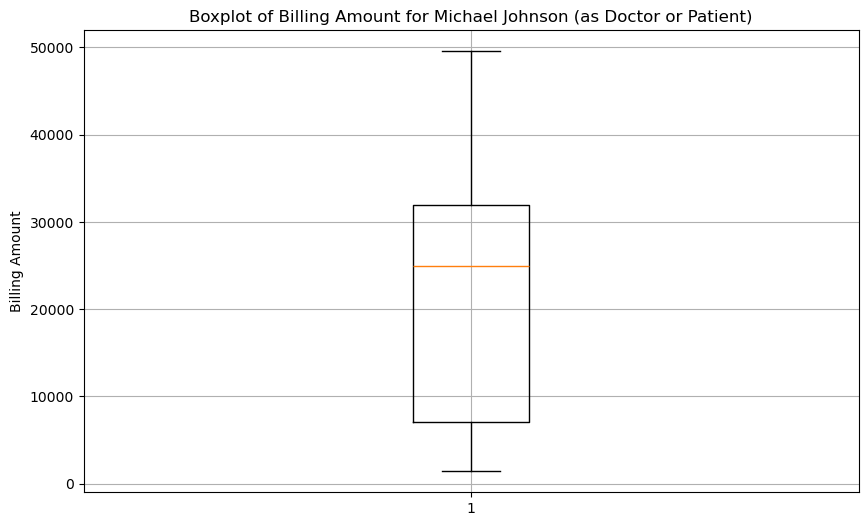

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("healthcare_dataset.csv")   # ← replace with your actual filename

# Standardize column names
df.columns = df.columns.str.strip()

# Filter: Michael Johnson as Doctor OR Patient
df_mj = df[(df['Doctor'] == 'Michael Johnson') | (df['Name'] == 'Michael Johnson')]

# ---- BOX PLOT ----
plt.figure(figsize=(10,6))

# Choose numeric column to visualize
plt.boxplot(df_mj['Billing Amount'].dropna(), vert=True)

plt.title("Boxplot of Billing Amount for Michael Johnson (as Doctor or Patient)")
plt.ylabel("Billing Amount")
plt.grid(True)

plt.show()


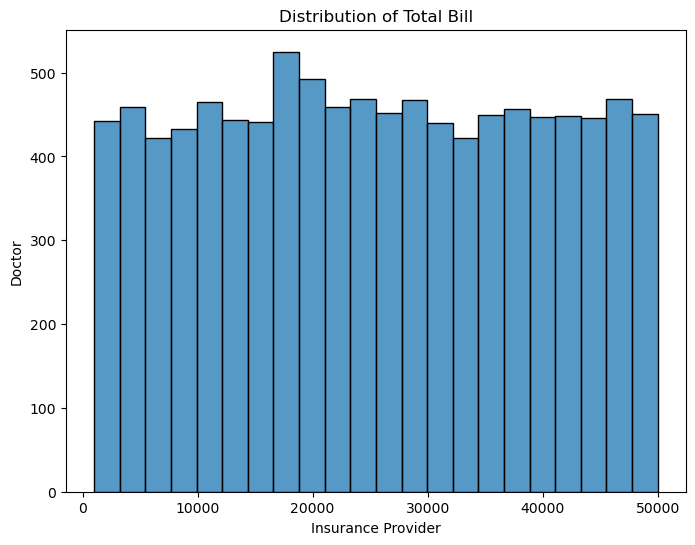

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(df['Billing Amount'])
plt.title('Distribution of Total Bill')
plt.xlabel('Insurance Provider')
plt.ylabel('Doctor')
#sns_plot.figure.savefig("seaborn_plot.png", format='png')
plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
from scipy import stats 
import numpy as np

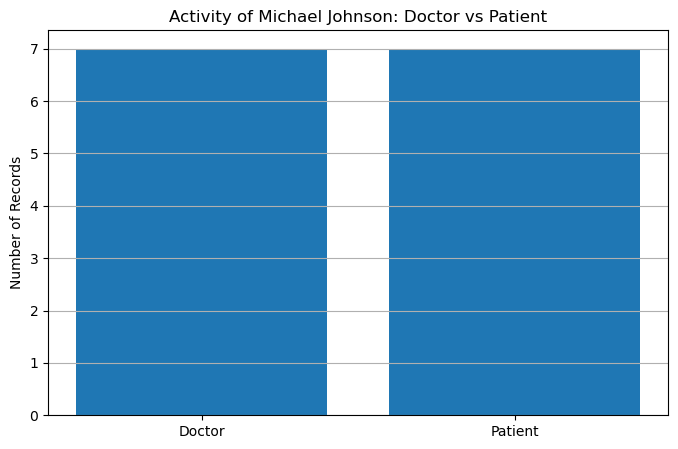

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("healthcare_dataset.csv")   # ← Replace with your actual file name

# Clean column names
df.columns = df.columns.str.strip()

# Filter
df_as_doctor = df[df["Doctor"] == "Michael Johnson"]
df_as_patient = df[df["Name"] == "Michael Johnson"]

# Prepare summary
roles = ["Doctor", "Patient"]
counts = [len(df_as_doctor), len(df_as_patient)]

# Plot
plt.figure(figsize=(8,5))
plt.bar(roles, counts)

plt.title("Activity of Michael Johnson: Doctor vs Patient")
plt.ylabel("Number of Records")

plt.grid(axis='y')
plt.show()


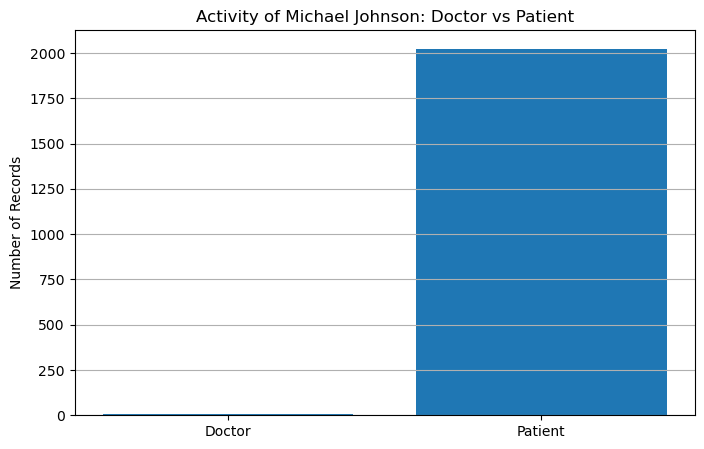

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("healthcare_dataset.csv")   # ← Replace with your actual file name

# Clean column names
df.columns = df.columns.str.strip()

# Filter
df_as_doctor = df[df["Doctor"] == "Michael Johnson"]
df_as_patient = df[df["Insurance Provider"] == "Aetna"]

# Prepare summary
roles = ["Doctor", "Patient"]
counts = [len(df_as_doctor), len(df_as_patient)]

# Plot
plt.figure(figsize=(8,5))
plt.bar(roles, counts)

plt.title("Activity of Michael Johnson: Doctor vs Patient")
plt.ylabel("Number of Records")

plt.grid(axis='y')
plt.show()


In [28]:
import pandas as pd

# Load your file
df=pd.read_csv("healthcare_dataset.csv")   # ← Replace with uploaded file name

# Standardize column names for safety (optional)
df.columns = df.columns.str.strip()

# 1️⃣ DataFrame where MICHAEL JOHNSON is the DOCTOR
df_doctor_mj = df[(df['Doctor'] == 'Michael Johnson') | (df['Name'] == 'Michael Johnson')]
print("---- Michael Johnson as DOCTOR ----")
print(df_doctor_mj)

---- Michael Johnson as DOCTOR ----
                 Name  Age  Gender Blood Type Medical Condition  \
1862  Sherri Mckinney   67    Male         O+            Asthma   
5668  Michael Johnson   74  Female         B+         Arthritis   
5908  Brittany Glover   57    Male         A+            Asthma   
6242  Michael Johnson   27    Male        AB+          Diabetes   
6397     Maria Carter   59  Female        AB-          Diabetes   
6411    Joshua Bailey   78  Female         A+           Obesity   
6875     Rebecca King   45  Female         O+            Cancer   
7157  Michael Johnson   32    Male         B+         Arthritis   
8212  Michael Johnson   75  Female        AB-            Asthma   
8627  Michael Johnson   61  Female        AB-           Obesity   
9085   Peter Matthews   30    Male         B-            Asthma   
9748  Michael Johnson   48  Female         A+           Obesity   
9804  Michael Johnson   73    Male         B+         Arthritis   
9909   Jonathan Perry   24

In [29]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


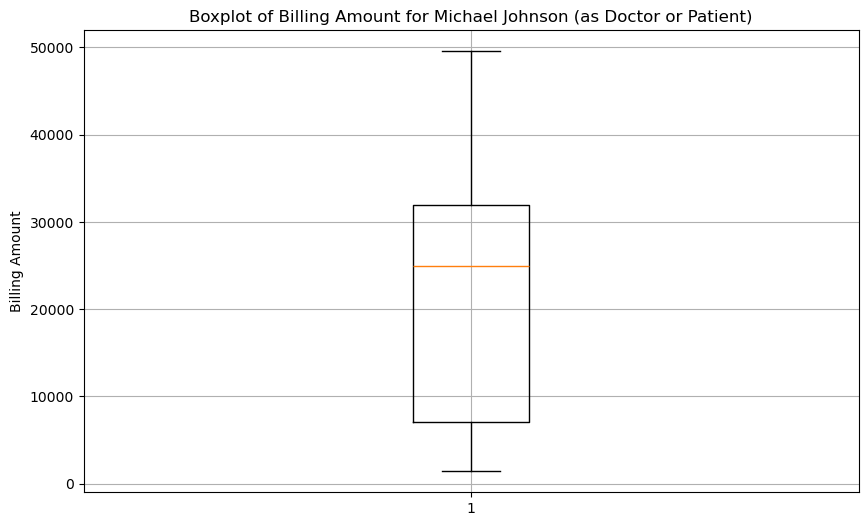

In [31]:
plt.figure(figsize=(10,6))

# Choose numeric column to visualize
plt.boxplot(df_doctor_mj['Billing Amount'].dropna(), vert=True)

plt.title("Boxplot of Billing Amount for Michael Johnson (as Doctor or Patient)")
plt.ylabel("Billing Amount")
plt.grid(True)

plt.show()

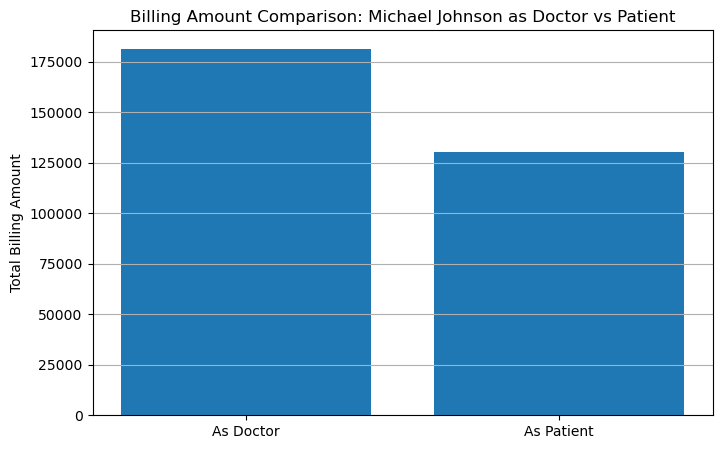

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("healthcare_dataset.csv")   # ← replace with your filename

# Clean column names
df.columns = df.columns.str.strip()

# Filter Michael Johnson as Doctor and as Patient
df_as_doctor = df[df["Doctor"] == "Michael Johnson"]
df_as_patient = df[df["Name"] == "Michael Johnson"]

# Prepare data for graph
labels = ["As Doctor", "As Patient"]
billing_values = [
    df_as_doctor["Billing Amount"].sum(),
    df_as_patient["Billing Amount"].sum()
]

# Create bar graph
plt.figure(figsize=(8, 5))
plt.bar(labels, billing_values)

plt.title("Billing Amount Comparison: Michael Johnson as Doctor vs Patient")
plt.ylabel("Total Billing Amount")
plt.grid(axis="y")

plt.show()
